# HISTOGRAMS
A histogram is a type of plot that shows the distribution of numerical data.

It tells you how data frequently data falls within certain intervals (bins).


(array([ 2.,  0.,  9., 36., 58., 59., 47., 21., 11.,  7.]),
 array([137.77884796, 143.85354739, 149.92824683, 156.00294626,
        162.0776457 , 168.15234513, 174.22704457, 180.30174401,
        186.37644344, 192.45114288, 198.52584231]),
 <BarContainer object of 10 artists>)

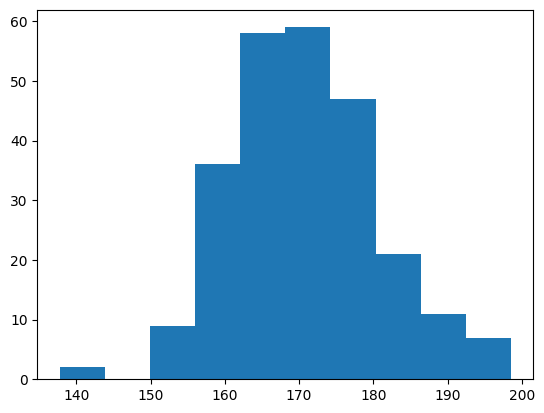

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

x = np.random.normal(170, 10, 250)

plt.hist(x)

We can further customize the histogram as seen below

bins = bins are the bars covering a range of values

edgecolor = the outline behind each bar

color =  color of each bar

aplha = controls the opacity of the bars

histtype = this controls the style of the histogram



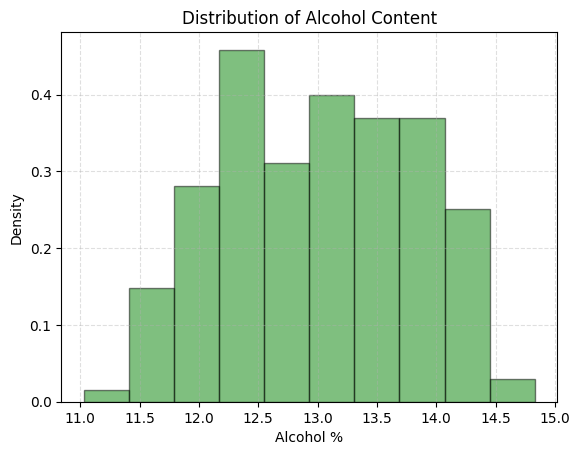

In [ ]:
columns = [
    'Class', 'Alcohol', 'MalicAcid', 'Ash', 'AlcalinityOfAsh', 'Magnesium',
    'TotalPhenols', 'Flavanoids', 'NonflavanoidsPhenols', 'Proanthocyanins',
    'ColorIntensity', 'Hue', 'OD280_0D315', 'ProLine'
]

wine = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data",
    header=None, names=columns    
)


plt.hist(wine['Alcohol'], bins=10, edgecolor='black', color='green', alpha=0.5, density=True, histtype= 'bar'
         )
plt.title('Distribution of Alcohol Content')
plt.xlabel('Alcohol %')
plt.ylabel('Density')
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

# 2D Histogram 
It is also known as Bivariate Histogram

It shows the relationship between two numeric variables.

Think of it as dividing your data into small rectangular cells(bins) along both the x and y axes -- then counting how many points fall into each cell.

It helps visualize density patterns or correlations when you have lots of data.



When we have two variables x and y(In the example below I have used alcohol and colorIntensity from the dataset)

Now, instead of drawing points, plt.hist2d() divids the whole area into a grid of 2 boxes(called bins)

It then counts how may wines fall inside each box (Light color = few wines, Dark color = many wines)

So its like a heatmap showing where your data is concetrated

In [ ]:
print(wine[:5])

   Class  Alcohol  MalicAcid   Ash  AlcalinityOfAsh  Magnesium  TotalPhenols  \
0      1    14.23       1.71  2.43             15.6        127          2.80   
1      1    13.20       1.78  2.14             11.2        100          2.65   
2      1    13.16       2.36  2.67             18.6        101          2.80   
3      1    14.37       1.95  2.50             16.8        113          3.85   
4      1    13.24       2.59  2.87             21.0        118          2.80   

   Flavanoids  NonflavanoidsPhenols  Proanthocyanins  ColorIntensity   Hue  \
0        3.06                  0.28             2.29            5.64  1.04   
1        2.76                  0.26             1.28            4.38  1.05   
2        3.24                  0.30             2.81            5.68  1.03   
3        3.49                  0.24             2.18            7.80  0.86   
4        2.69                  0.39             1.82            4.32  1.04   

   OD280_0D315  ProLine  
0         3.92     1065 

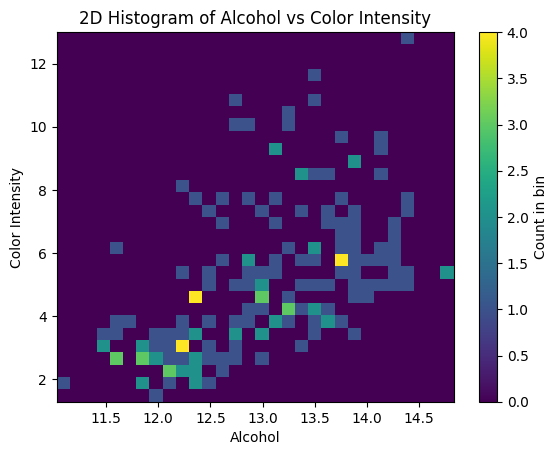

In [ ]:
plt.hist2d(wine['Alcohol'], wine['ColorIntensity'],bins=30, cmap='viridis')
plt.colorbar(label='Count in bin')
plt.xlabel('Alcohol')
plt.ylabel('Color Intensity')
plt.title('2D Histogram of Alcohol vs Color Intensity')
plt.show()

# Hexagonal Binnings
A hexagonal binning plot is just like a 2D histogram but plt.hexbin

It groups points into bins and counts how many fall into each bin but the bins are hexagon-shaped instead of squares.

Why use hexagons:
    - when data have equal distance to all neighbors(when we use squares there is less bias)

    - To make the density patterns look smoother and more natural.

    - when we have large datasets

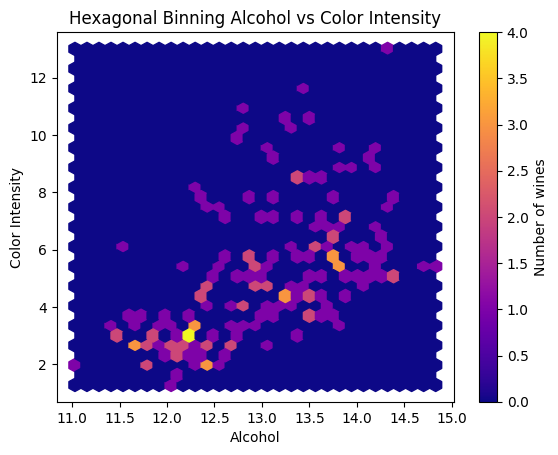

In [ ]:
plt.hexbin(wine['Alcohol'], wine['ColorIntensity'],gridsize=30, cmap='plasma')
plt.colorbar(label='Number of wines')
plt.xlabel('Alcohol')
plt.ylabel('Color Intensity')
plt.title('Hexagonal Binning Alcohol vs Color Intensity')
plt.show()

# KERNEL DENSITY ESTIMATE
KDE is a smoother, more flexible way to visualize distributions.

Instead of chopping your data into boxes(bins), it places a small, smooth(called a kernel) on top of each data point and adds them all up.

The result is a smooth curve that represents the probability density of your data.

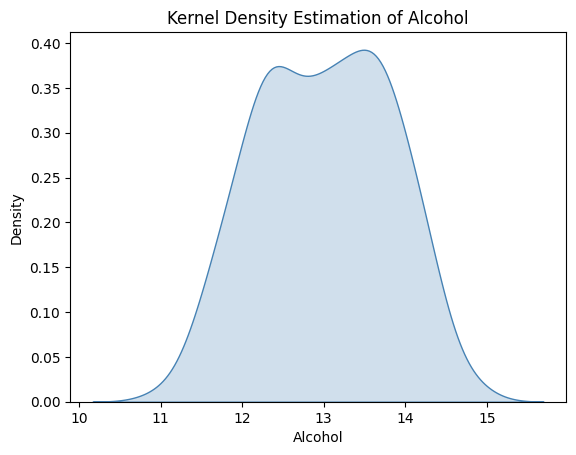

In [ ]:
# This gives a cleaner sense of the Alcohol data
sns.kdeplot(wine['Alcohol'], fill=True, color='steelblue')
plt.xlabel('Alcohol')
plt.ylabel('Density')
plt.title('Kernel Density Estimation of Alcohol')
plt.show()

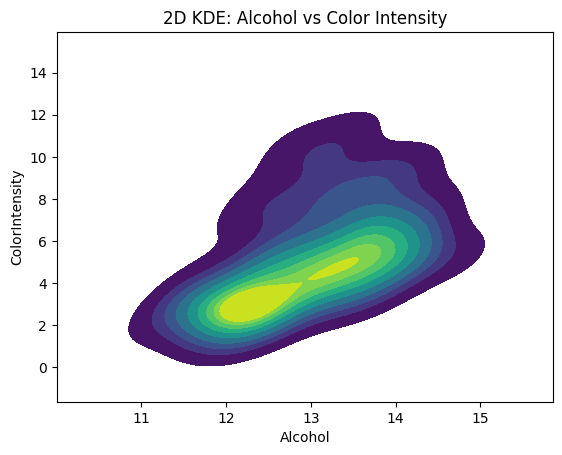

In [ ]:
sns.kdeplot(
    x=wine['Alcohol'],
    y=wine['ColorIntensity'],
    fill=True,
    cmap='viridis',
    thresh=0.05
)
plt.title('2D KDE: Alcohol vs Color Intensity')
plt.show()

#For the 2D, It creates contour regions(like heatmaps), showing where the data is most dense
#The math in the backend is a kernel function(Gaussian curve)